In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

cifar10 = tf.keras.datasets.cifar10

(50000, 1)
(10000, 1)


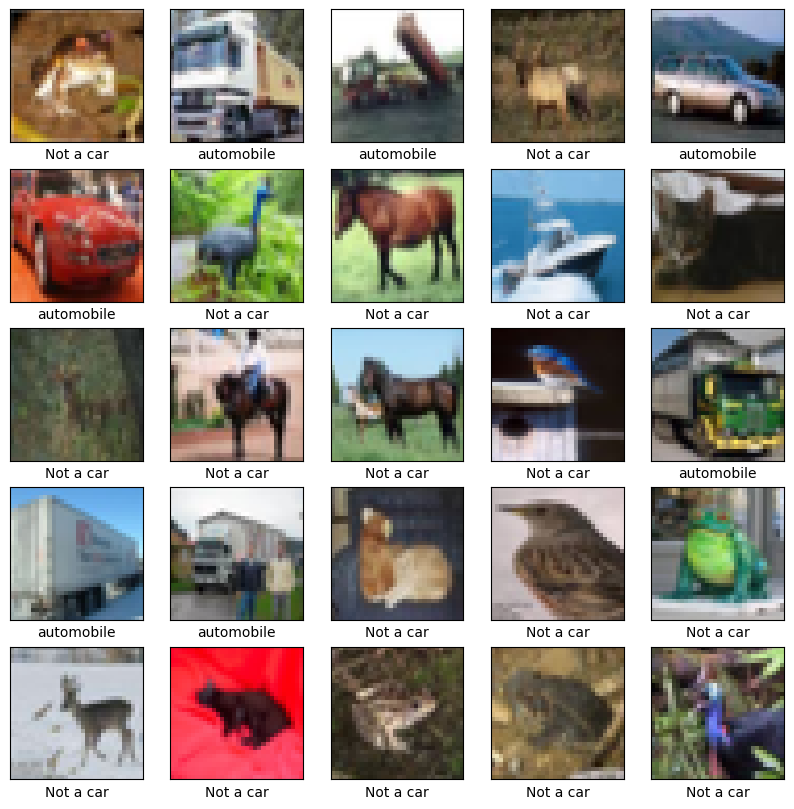

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# Label and plot images
''' 
I changed this from the full list to just two:
This GREATLY improves model accuracy
'''
class_names = ['Not a car', 'automobile']

print(y_train.shape)
print(y_test.shape)
# Change data set to only have 2 labels
for i in range(50000):
    if y_train[i][0] not in {1, 9}:
        y_train[i][0] = 0
    else:
        y_train[i][0] = 1
        
for i in range(10000):
    if y_test[i][0] not in {1, 9}:
        y_test[i][0] = 0
    else:
        y_test[i][0] = 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [37]:
# Code taken from https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet
# please dont use in final project
import numpy as np

# Standardize data (?)
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

x_test_standardized = (x_test - x_train_mean) / x_train_std

# Flatten the images
#x_train_flat = x_train_standardized.reshape(x_train_standardized.shape[0], -1)
#x_test_flat = x_test_standardized.reshape(x_test_standardized.shape[0], -1)


In [50]:
# Code taken from https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet
# * Don't use in final project, just for testing
from tensorflow.keras import layers
from functools import partial
# Create the model architecture
model1 = tf.keras.models.Sequential(name="MLP_model")
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                     activation="relu", kernel_initializer="he_normal")

# This is DEFINITELY overkill but man it's accurate
model1 = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=2, activation="softmax")
])

#model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# add down here the convulutional network model

In [51]:
# yes this code is stolen again
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
#model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.summary()



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,107,010 (8.04 MB)

 Trainable params: 2,107,010 (8.04 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# more stolen code
# training the model

history = model1.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8596 - loss: 0.4050 - val_accuracy: 0.9187 - val_loss: 0.2041
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9150 - loss: 0.2151 - val_accuracy: 0.9291 - val_loss: 0.1841
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9238 - loss: 0.1945 - val_accuracy: 0.9221 - val_loss: 0.2036
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9317 - loss: 0.1778 - val_accuracy: 0.9294 - val_loss: 0.1844
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9382 - loss: 0.1610 - val_accuracy: 0.9319 - val_loss: 0.1706
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9394 - loss: 0.1533 - val_accuracy: 0.9373 - val_loss: 0.1689
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9456 - loss: 0.1447 - val_accuracy: 0.9412 - val_loss: 0.1528
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9480 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


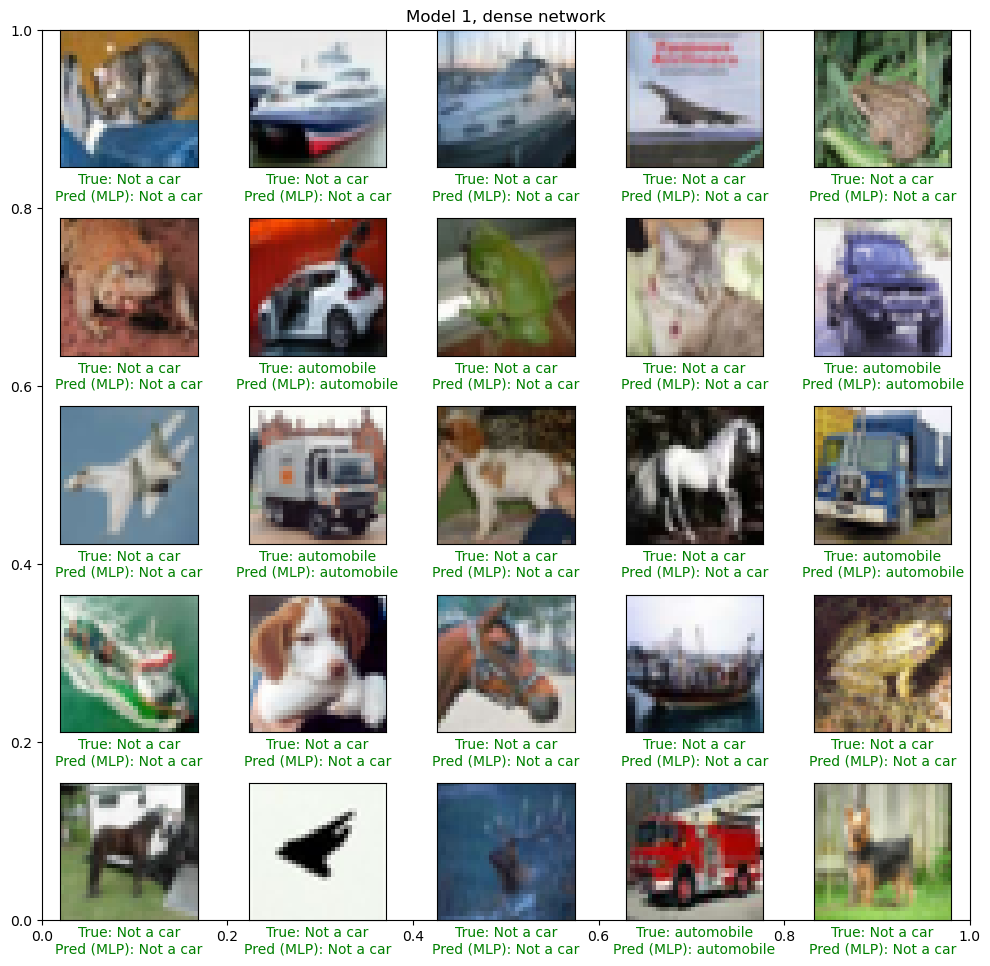

In [53]:
# * don't use in final project
# checking the accuracy

# Get predictions for the test set
predictions_mlp = model1.predict(x_test)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
plt.title("Model 1, dense network")
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

In [ ]:
# notice the normal dense network really only gets so good, probably should use something else (or just use more epochs)